# Linear Regression with Multiple Features 

Begin by importing all necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
%matplotlib inline 

mpl.style.available
mpl.style.use('ggplot') 

Load LinRegMultiDataset.csv onto a data frame. Use pd.read_csv(...)

In [2]:
df = pd.read_csv('data/LinRegMultiDataset.csv')

Explore first lines and data format using df.head()

In [3]:
df.head()

,X1,X2,Y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Use plt.scatter() to plot X1 against Y, then X2 against Y

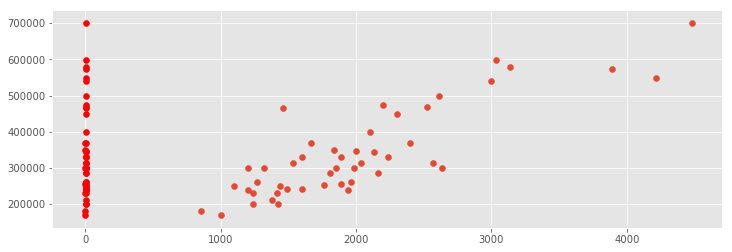

In [4]:
plt.figure(figsize=(12, 4))
plt.scatter(df.X1,df.Y)
plt.scatter(df.X2,df.Y, c='r')

## Feature Scaling

Write function to scale features according to:

$$x_i = \frac{x_i - \mu_i}{std(x_i)}$$

Use mean() and max() operators built into pandas to do this.
The function should should return both the scaled input vector, as well as the mean and standard deviation to be used to scale future samples.
    

In [5]:
def FeatureScale(x):
    mu = x.mean()
    std = x.std()
    x_scaled = (x - mu) / std
    return x_scaled, mu, std

Scale both input features and store in new columns in data frame (also storing mean and standard deviation)

In [6]:
df['X1_scaled'], X1_mu, X1_std = FeatureScale(df.X1)
print df['X1'].max()
df['X2_scaled'], X2_mu, X2_std = FeatureScale(df.X2)

4478


Replot using plt.scatter() to check the scaling effect

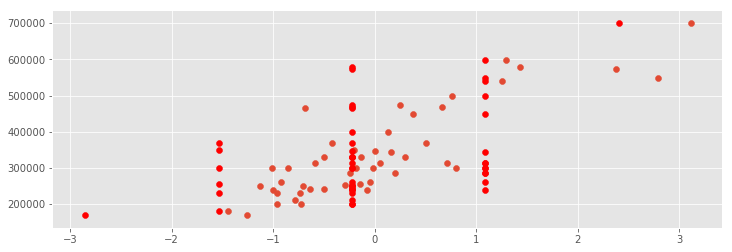

In [7]:
plt.figure(figsize=(12, 4))
plt.scatter(df.X1_scaled,df.Y)
plt.scatter(df.X2_scaled,df.Y, c='r')

## Multi-variate Linear Function
(with two x inputs and three variables)

$$y =  \theta_0+\theta_1 x_1 + \theta_2 x_2$$

In [8]:
def LinFunc(x1, x2, theta_0, theta_1, theta_2):
    y = theta_0 + theta_1*x1 + theta_2*x2
    return y

## Multi-variate Gradient Descent

Define cost function:
$$C = \frac{1}{2m} \sum_{i=1}^m (y_{pred}^i - y_{obs}^i)^2$$

In [9]:
def CostFunction(y_obs,y_pred):
    cost = np.sum((y_pred - y_obs)**2) / (2*np.size(y_pred))
    return cost

Define gradient function:
$$g_j = \frac{1}{m} \sum_{i=1}^m (y_{pred}^i - y_{obs}^i).x^i_j$$
Which takes both predicted and observed values, and a feature vector (x).

In [10]:
def g(y_obs,y_pred,x):
    g = (1/float(np.size(y_pred))) * np.sum((y_pred - y_obs)*x)
    return g

**Exercise** <br>Finish gradient descent algorithm where:
$$\theta_j := \theta_j - \alpha g_j$$
remembering that 
$$x_0^i = 1 \quad \text{for all } i$$

In [11]:
def GradDescent(df, theta_0,theta_1,theta_2,alpha,num_iters):
    
    #C_history records values for plotting
    C_history = []
    
    #Initalises Ypredicted to ensure existence in dataframe
    df['Ypredicted'] = df.Y
    
    for i in np.arange(num_iters):
        #Calculate prediction for parameter values
        df.Ypredicted = LinFunc(df.X1_scaled, df.X2_scaled, theta_0, theta_1, theta_2)
        
        #Update parameters
        theta_0 = theta_0 - alpha * g(df.Y,df.Ypredicted,1)
        theta_1 = theta_1 - alpha * g(df.Y,df.Ypredicted,df.X1_scaled)
        theta_2 = theta_2 - alpha * g(df.Y,df.Ypredicted,df.X2_scaled)
            
        C_history.append([CostFunction(df.Y,df.Ypredicted)])
        
        
    print "Finished at ", [theta_0,theta_1,theta_2]
    return theta_0, theta_1, theta_2, np.array(C_history)

Set initial guess for all three parameters and alpha value, then run Gradient Descent algorithm

In [12]:
theta_0_guess = 0#TYPEHERE
theta_1_guess = 0#TYPEHERE
theta_2_guess = 0#TYPEHERE
alpha = 0.5#TYPEHERE
num_iters = 50#TYPEHERE

theta_0, theta_1, theta_2, C_history = GradDescent(df, theta_0_guess,theta_1_guess,theta_2_guess,alpha,num_iters)

Finished at  [340412.65957446775, 110630.73229541267, -6649.156287386372]



Use plt.plot() to plot the Cost function history and ensure convergence

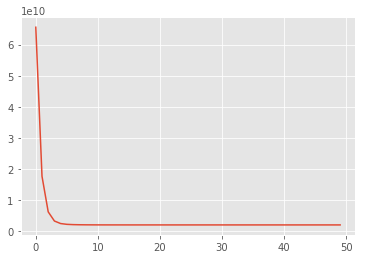

In [13]:
plt.plot(C_history)

**Exercise**

Use trained parameters to predict output when x1 = 2200 and x2 = 3.
Remember to scale input features accordingly!

In [ ]:
x1 = #TYPEHERE
x2 = (3 - X2_mu) / X2_std

Ypred = LinFunc(x1, x2, theta_0, theta_1, theta_2)
print Ypred

Go back and re-run algorithm, modifying alpha and re-plotting cost function history to see how alpha influences convergence